In [1]:
import pandas as pd
import numpy as np
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly as py
import matplotlib.pyplot as plt
from sklearn.utils import shuffle

In [2]:
data = pd.read_csv("examData.csv")
data = shuffle(data)
data.head()

,exam1,exam2,result
20,67.372028,42.838438,0
78,60.455556,42.508409,0
19,76.978784,47.575964,1
89,52.348004,60.769505,0
34,40.236894,71.167748,0


In [3]:
X = data.iloc[: , : 2]
Y = data.iloc[: , 2:]
X['exam1'] -= X['exam1'].mean()
X['exam1'] /= X['exam1'].max()
X['exam2'] -= X['exam2'].mean()
X['exam2'] /= X['exam2'].max()
x_train = X.iloc[:int(X.shape[0] * .7) , :]
y_train = Y.iloc[:int(Y.shape[0] * .7) , :].values
x_test = X.iloc[int(X.shape[0] * .7): , :]
y_test = Y.iloc[int(Y.shape[0] * .7): , :]
x_axis = []
y_axis = []

In [4]:
intercept = np.ones((x_train.shape[0], 1))
x_train = np.concatenate((intercept, x_train), axis=1)
intercept = np.ones((x_test.shape[0], 1))
x_test = np.concatenate((intercept, x_test), axis=1)
theta = np.zeros((x_train.shape[1] , 1))
lambdda = 0

In [5]:
def gradient_descent(X, y , h):
    return (np.dot(X.T, (h - y))) / y.shape[0]
def sigmoid(X, weight):
    z = np.dot(X, weight)
    return 1 / (1 + np.exp(-z))
def find_hessian(h , X  , Y):
    Hess = np.zeros(shape = (3 , 3))
    for i in range (X.shape[0]):
        hess =np.matmul(x_train[i:i+1, :].T , x_train[i:i+1 , :])
        hess = hess*(h[i])*(1-h[i])
        Hess += hess
    return Hess

In [6]:
epochs = 100
for i in range(epochs):
    h = sigmoid(x_train, theta)
    loss = (h - y_train)**2
    x_axis.append(i)
    y_axis.append(np.average(loss))
    f1 = gradient_descent(x_train , y_train , h)
    f2 = find_hessian(h , x_train , y_train)
    theta -= np.dot(f1.T , np.linalg.pinv(f2)).T
    theta.shape

In [7]:
result = sigmoid(x_test , theta)
c = 0
y_test = y_test.values

In [8]:
for i in range(x_test.shape[0]):
    if(round(float(result[i])) == float(y_test[i])):
        c += 1

In [9]:
accuracy = c/y_test.shape[0]
print("accuracy:" , accuracy * 100)

accuracy: 90.0


<IPython.core.display.Javascript object>


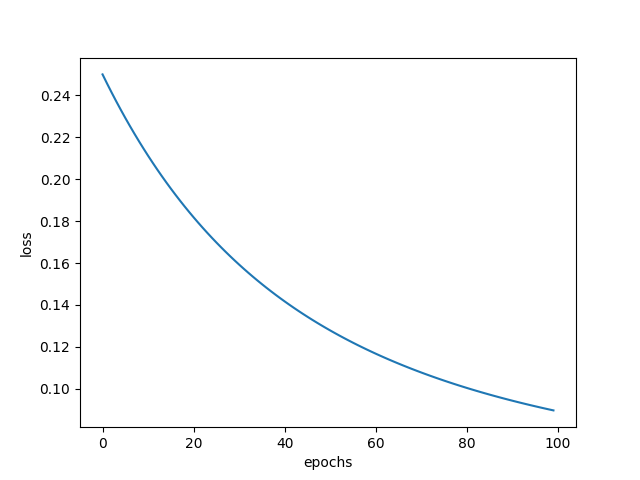

In [17]:
plt.plot(x_axis , y_axis)
plt.xlabel('epochs')
plt.ylabel('loss')
plt.show()

In [11]:
w = theta.flatten()

<IPython.core.display.Javascript object>


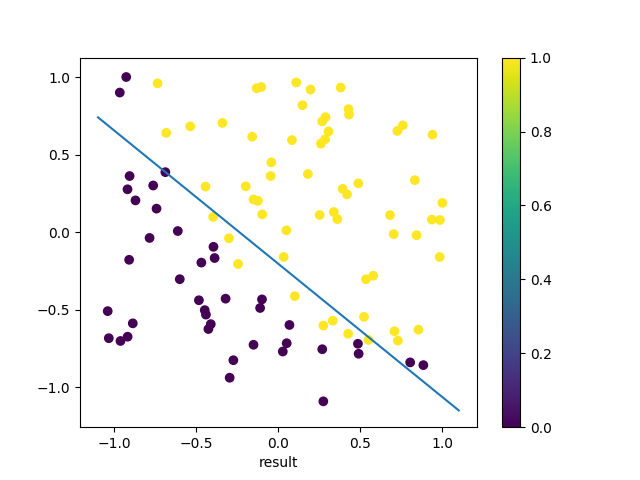

In [18]:
def calc(x):
    return (-(w[0]/w[1]) - (w[2]/w[1]) * x)

xx = np.linspace(-1.1,1.1)
yy = calc(xx)
# X = X.values
# Y = Y.values
plt.plot(xx,yy)
plt.xlabel(data.columns[2])
plt.scatter(X[: , 0],X[: , 1],c = Y[: ,0])
plt.colorbar()